<h1><center>Data Science Path Udit Sharma Phase 1 Jupyter Notebook</center></h1>

<h2>Section 1: Reading the Dataset</h2>

The following code is to import the datasets. 
1. The 'df' dataframe contains the dataset given in this assignment
2. The 'df_index' dataframe contains the otago deprivation index dataset

In [1]:
import json
import sys
sys.path.append(r'C:\Users\udit sharma\Desktop\MSA\2020-Phase-1\Data Science and Machine Learning')
#change the path above
import pandas as pd
import requests

# df = pd.read_csv('Dataset.csv')
# df_index=pd.read_excel('otago730395.xlsx')
#Above two commands can be used when the dataset is stored. Please change the system path and use above commands to create
#dataframes. You can directly jump to data analysis section 3 a commented command
#that will directly create the final dataset is also given.


Below is the code to check for data in assignment dataset

In [2]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


Below is the output for Depriviation Index Dataset

In [3]:
df_index.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


<h2>Section 2: Data Collection, API calling and Final data creation</h2>

The following code is to fetch the dataset from the koordinates dataset using the koordinates API. It takes the dataframe as an input. The API takes latitude, longitude, layer and key as the inputs and is used to find the 'C18_CURPop' column in the resulting dataset. The data is returned in JSON format and thus is parsed inside the function.

In [4]:
def get_census(dataframe):
 url='https://koordinates.com/services/query/v1/vector.json'
 census={}
 sa=dataframe.loc[:,'SA1']
 i=0
 for sa1 in sa:


    params = {
        'key' : '7f7a33c9ddc94259bf32bb7ec2df2000',
         'layer' : 104612,
       'x' : dataframe['Longitude'][i],
        'y' : dataframe['Latitude'][i],
        'max_results' : 1

    }

    response = requests.get(url, params=params)
    if response.status_code != 200:
        print('result issue for:',sa1)
    flag=0
    if(str(response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['SA12018_V1_00'])==str(sa1)):
        census[sa1]=response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
       
    else:
        print('The key issue for sa1:',sa1,' Found the sa1:',response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['SA12018_V1_00'])

    i+=1
 return census  

Following code takes the 'SA1' as input and returns the census data to perform the join in the table. It also calls the 'get_census' function to find value corresponding to each SA1.

In [5]:
census=get_census(df)
def join_censusData(sa1):
    return census[sa1]

The following code is to run the above function. It uses apply function to run the 'join_censusData' function for all the values of 'SA1' and appends it with the dataframe creating a new column 'CU18'.

In [6]:
df['CU18']=df.SA1.apply(join_censusData)

The following code seperates the useful data from the depriviation index dataset.

In [7]:
import numpy as np
df_depindex=df_index.loc[:,['SA12018_code','NZDep2018_Score','NZDep2018']]
df_depindex.head()

,SA12018_code,NZDep2018_Score,NZDep2018
0,7000000,1245.0,10.0
1,7000001,1245.0,10.0
2,7000002,NaN,NaN
3,7000003,1207.0,10.0
4,7000004,1093.0,9.0


The following code uses merge function to merge the deprivation index dataset with the 'df' data frame using 'SA1' as the joining condition. The code also drops the extra column coming due to join.

In [8]:
datafinal=df.merge(df_depindex, left_on='SA1',right_on='SA12018_code',
          suffixes=('none','_right'))
datafinal=datafinal.drop(columns='SA12018_code')

Below is the final Merged dataset

In [9]:
datafinal.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,CU18,NZDep2018_Score,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,997.0,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,881.0,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,881.0,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,908.0,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,1091.0,9.0


<h2>Section 3: Data Analysis and Data Cleaning</h2>

The following contains the data analysis.

The following code uses describe function to describe min,max,standard etc for analyse the dataset.

In [ ]:
#Use the following code in case you want to skip above steps and directly read the datafinal
#datafinal=pd.read_excel('datafinal.xlsx')

In [10]:
datafinal.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,CU18,NZDep2018_Score,NZDep2018
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,986.503330,5.063749
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,94.287255,2.913471
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,849.000000,1.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,918.000000,2.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,959.000000,5.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,1031.000000,8.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,1380.000000,10.000000


The following code desribes all the data types.

In [11]:
datafinal.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area           object
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
CU18                 int64
NZDep2018_Score    float64
NZDep2018          float64
dtype: object

The machine learning models (sklearn) being used in this report work on mostly numeric, float or binary data only. Thus there is a need to convert the data in that format.

The Land Area column is shown as an object as it contains 'm2' etc inside it. So from it the numeric part needs to be extracted as shown below.

Also as the suburbs part is an object it needs to be either dropped or label encoded. As suburbs can be useful to predict the price so we need to convert the suburbs as string first and then label encode it.

In [12]:
datafinal['Land area']=datafinal['Land area'].str.extract('(\d+)').astype('float')
datafinal['Suburbs']=datafinal['Suburbs'].astype('str')

The following code is to label encode Suburbs. As suburbs are now in string format and can be divided in multiple classes it can be label encoded for now.

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
datafinal['Suburbs']= label_encoder.fit_transform(datafinal['Suburbs']) 

In [14]:
datafinal.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs              int32
CU18                 int64
NZDep2018_Score    float64
NZDep2018          float64
dtype: object

Now there is a need to check for null values in the dataset. Null values can be handeled by the machine learing models used here. To convert null values into useable data we need to either drop them or replace them. Following code shows the null values in the dataset.

In [15]:
datafinal.isna().sum() 

Bedrooms           0
Bathrooms          2
Address            0
Land area          0
CV                 0
Latitude           0
Longitude          0
SA1                0
0-19 years         0
20-29 years        0
30-39 years        0
40-49 years        0
50-59 years        0
60+ years          0
Suburbs            0
CU18               0
NZDep2018_Score    0
NZDep2018          0
dtype: int64

The address column is in the only column now we need to deal with. As address is always unique there is no point to convert it into classes as it will result into unique classes for each address. Address might effect the price of the property but as suburbs and the 'SA1' is already present thus address can be dropped for now as converting it to classes will only result in a high variant class data that mightnot be useful in predictions due to present of redundency and similar supporting address for location.

In [16]:
datafinal=datafinal.drop(columns='Address')

There are null values in bathroom column. For replacement of null values either the fillna() function can be used or an imputer can be used. For this assignment KNN imputer is used to fill the NaN values. As there are only 2 NaN values normal mean replacement can also work. The code for replacement is given below with mean replacement code is given commented.

In [17]:
collist=[cols for cols in datafinal.columns]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
datafinal_imputed=imputer.fit_transform(datafinal)

datafinal=pd.DataFrame(datafinal_imputed,columns=collist)

# datafinal['Bathrooms']=datafinal['Bathrooms'].fillna(datafinal['Bathrooms'].mean())

In [18]:
datafinal.isna().sum()

Bedrooms           0
Bathrooms          0
Land area          0
CV                 0
Latitude           0
Longitude          0
SA1                0
0-19 years         0
20-29 years        0
30-39 years        0
40-49 years        0
50-59 years        0
60+ years          0
Suburbs            0
CU18               0
NZDep2018_Score    0
NZDep2018          0
dtype: int64

In [19]:
datafinal.dtypes

Bedrooms           float64
Bathrooms          float64
Land area          float64
CV                 float64
Latitude           float64
Longitude          float64
SA1                float64
0-19 years         float64
20-29 years        float64
30-39 years        float64
40-49 years        float64
50-59 years        float64
60+ years          float64
Suburbs            float64
CU18               float64
NZDep2018_Score    float64
NZDep2018          float64
dtype: object

The following codes show the correlations. 

The first shows the pairplot or scatter plots, the second shows the heatmap and third shows the correlation matrix.

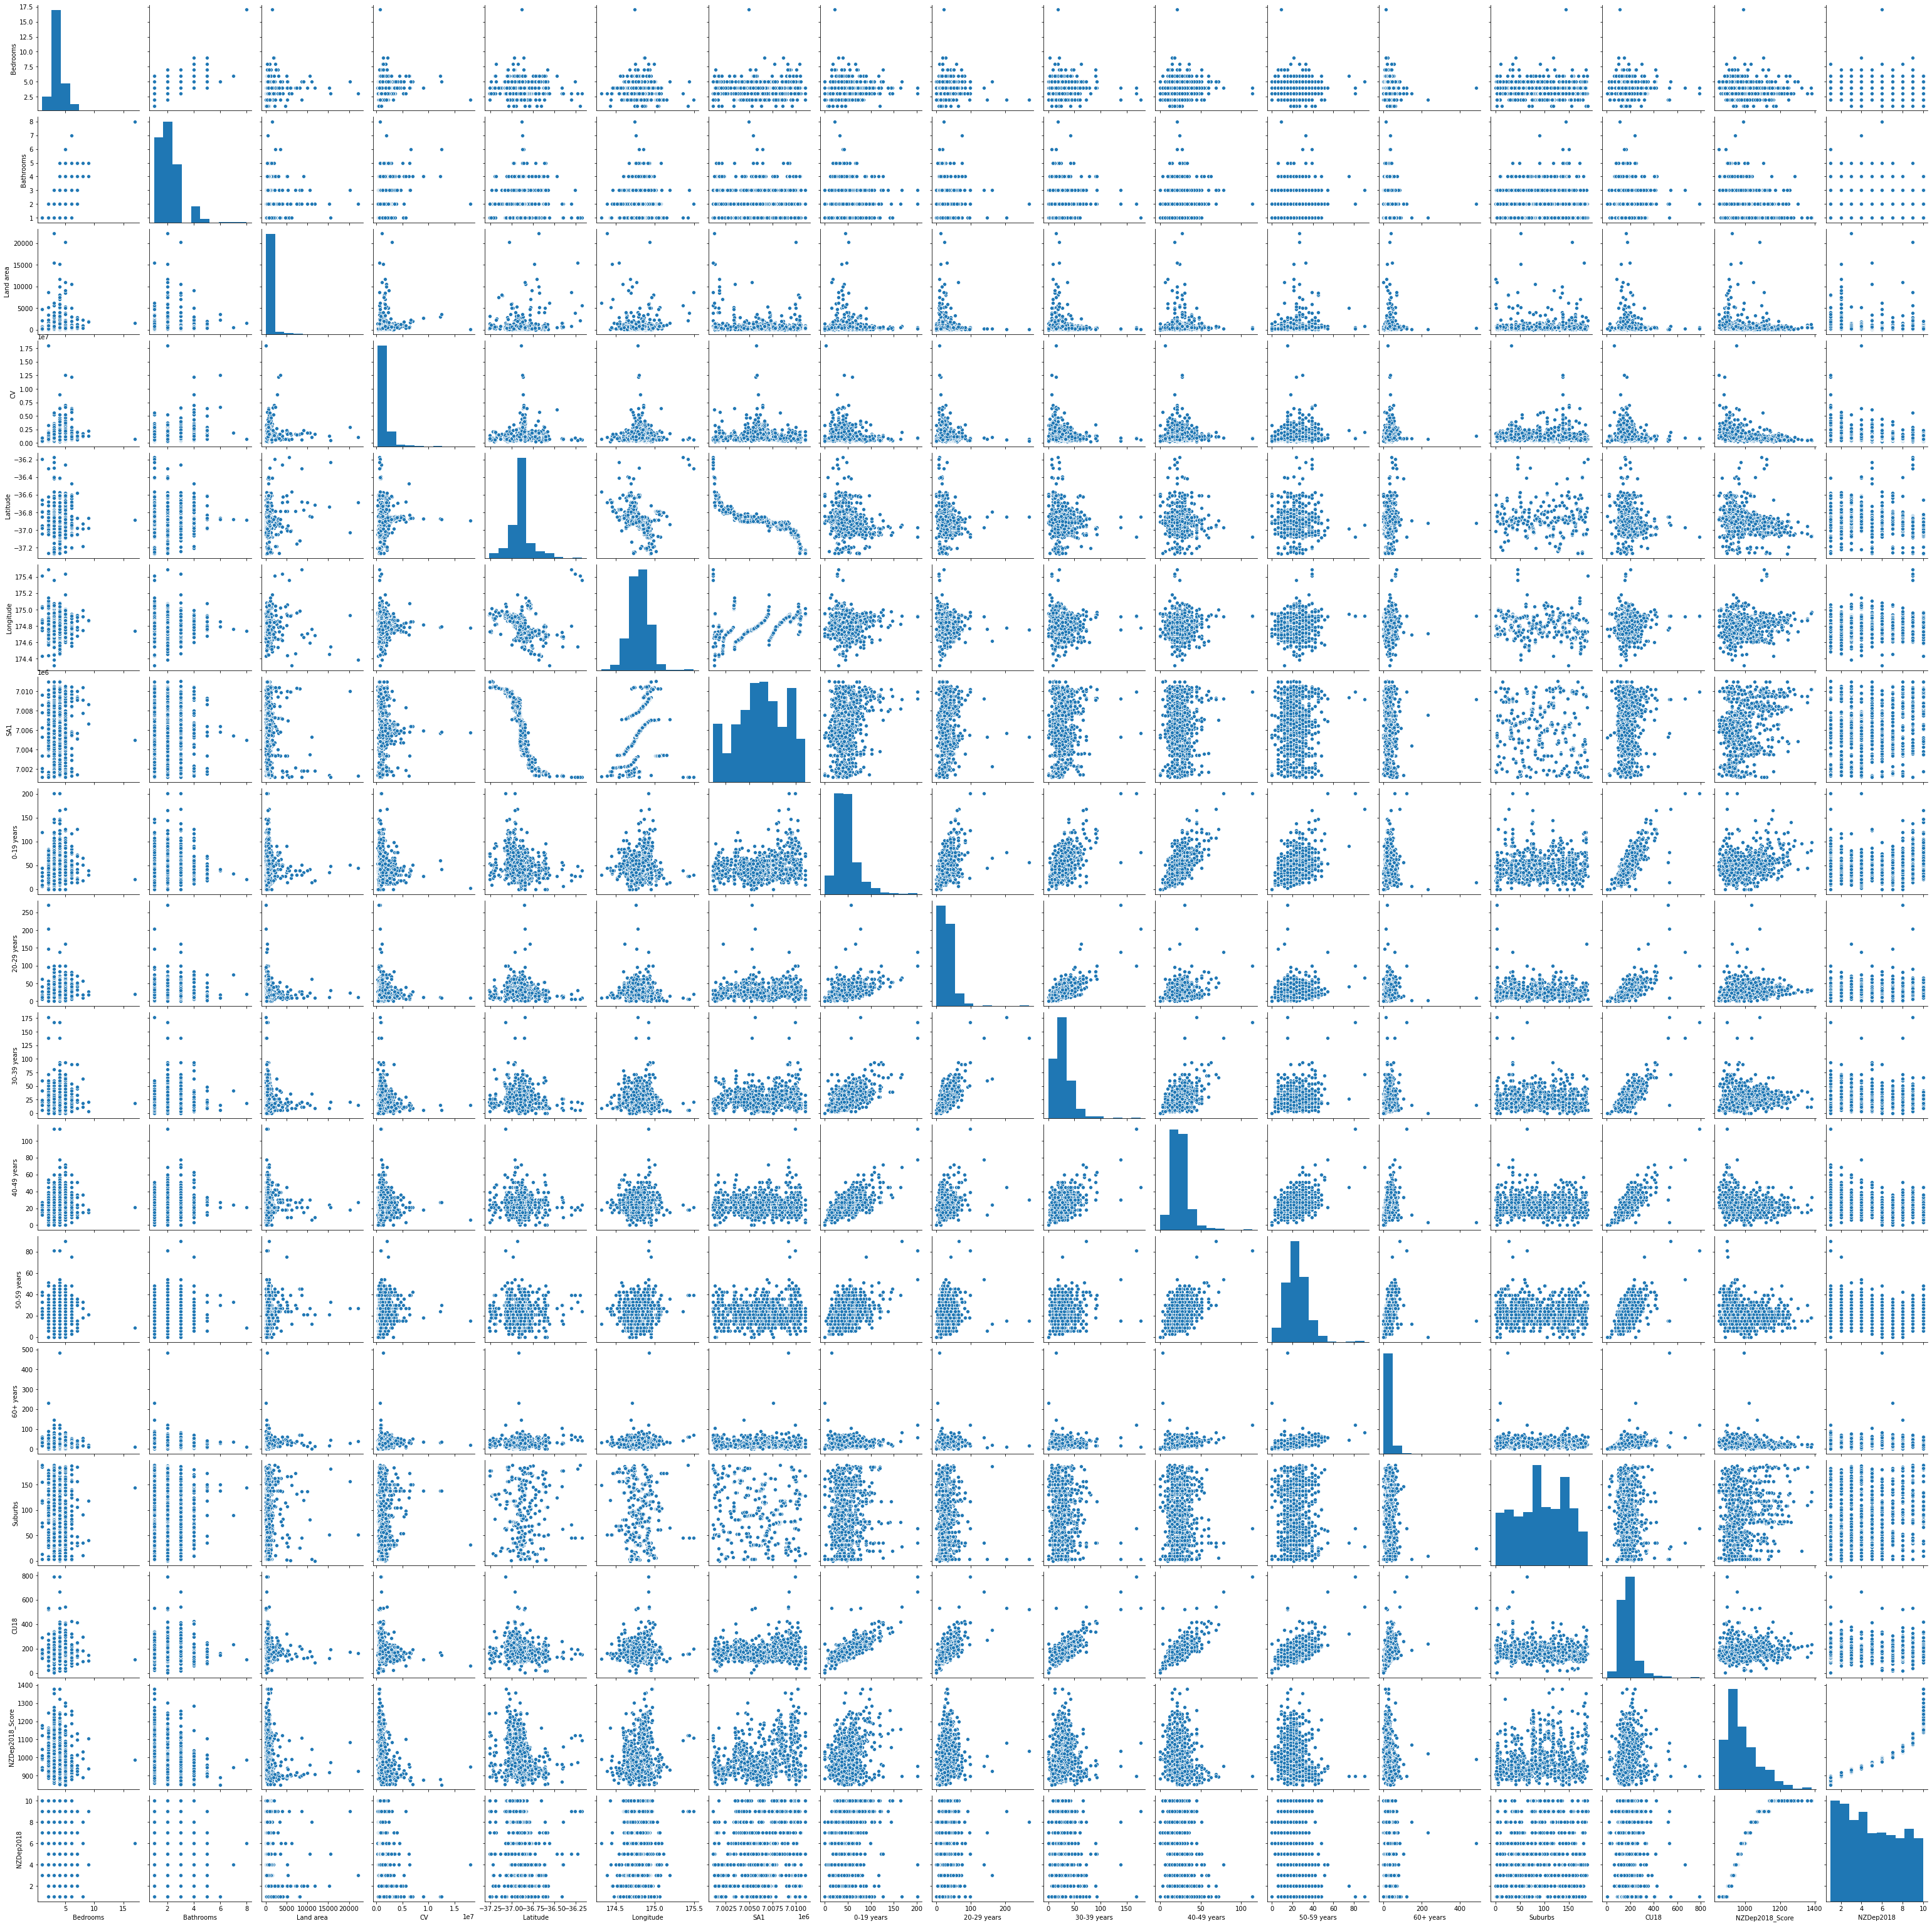

In [20]:
import seaborn as sns

sns.pairplot(datafinal)

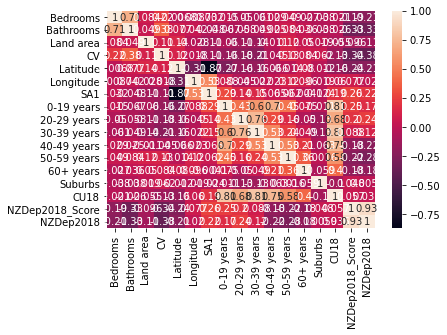

In [21]:
corrMatrix = datafinal.corr()
sns.heatmap(corrMatrix, annot=True)

In [22]:
print(corrMatrix)

                 Bedrooms  Bathrooms  Land area        CV  Latitude  \
Bedrooms         1.000000   0.710013   0.084039  0.224836 -0.006796   
Bathrooms        0.710013   1.000000   0.049257  0.375237  0.077391   
Land area        0.084039   0.049257   1.000000  0.112220  0.143953   
CV               0.224836   0.375237   0.112220  1.000000  0.120609   
Latitude        -0.006796   0.077391   0.143953  0.120609  1.000000   
Longitude        0.008724   0.042233  -0.028423  0.018317 -0.313644   
SA1              0.031734  -0.048291  -0.108108 -0.109920 -0.868723   
0-19 years       0.014726  -0.066793  -0.059760 -0.156010 -0.265840   
20-29 years     -0.050034  -0.057549  -0.110758 -0.182458 -0.160207   
30-39 years     -0.061118  -0.049168  -0.136252 -0.214312 -0.163642   
40-49 years      0.028757   0.024639  -0.011194 -0.044565 -0.066155   
50-59 years      0.048579   0.084115   0.123529  0.131029 -0.013536   
60+ years       -0.027102   0.035611   0.050270  0.083532  0.079791   
Suburb

<h2>Section 4: Data Modeling and Analysis</h2>

In this section I have done data modeling and anaysis. As the data is mostly continous thus regression models can be used. For this assignment I have used regression models from Sklearn python library.

As we can see from the correlation matrix depriviation score, bathroom, bedrooms and number of people in age bracket 30-39 are the most important factor affecting the prices('CV').

For intial data fitting first trying to see how the accurate the model can be with only these 4 parameters as they have correlation magnitude greated than (.2).

In [23]:
columnsList=['Bedrooms','Bathrooms','NZDep2018','30-39 years','CV','Suburbs']

datafinal_model=datafinal.loc[:,columnsList]
datafinal_model.head()

,Bedrooms,Bathrooms,NZDep2018,30-39 years,CV,Suburbs
0,5.0,3.0,6.0,24.0,960000.0,78.0
1,5.0,3.0,1.0,12.0,1250000.0,64.0
2,6.0,4.0,1.0,12.0,1250000.0,64.0
3,2.0,1.0,2.0,21.0,740000.0,101.0
4,3.0,1.0,9.0,33.0,630000.0,21.0


Following contains the code for spliting the data in predictors and target('CV').

In [24]:
target=datafinal.loc[:,'CV']
predictors=datafinal.loc[:,[col for col in datafinal_model.columns if col!='CV']]

Before training the model we need to divide the dataset into training and testing data. This is not always important but is useful to see how model behaves when introduced with new data. Incase we decide not to use train and test split we can fit the model with predictors and target and check how well it is able to fit with the existing data.

For this dataset we use train test split and split data into 80:20 train:test split.

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.2)

Below is the code for Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, auc
LiReg=LinearRegression()
LiReg.fit(pred_train,tar_train)
print('The accuracy for Linear regression is :',LiReg.score(pred_test,tar_test))

The accuracy for Linear regression is : 0.4021356814798239


Below is the code for Decision Tree Regression Model

In [27]:
from sklearn.tree import DecisionTreeRegressor
DTreg=DecisionTreeRegressor().fit(pred_train,tar_train)
print('The accuracy for Decision Tree Regressor: ', DTreg.score(pred_test,tar_test))

The accuracy for Decision Tree Regressor:  -0.9131314947492787


Below is the code for KNN Regression Model

In [28]:
from sklearn.neighbors import KNeighborsRegressor
KNNreg=KNeighborsRegressor().fit(pred_train,tar_train)
print('The accuracy for KNN Regressor: ', KNNreg.score(pred_test,tar_test))

The accuracy for KNN Regressor:  0.2525968037571982


Below is the Code for MLP Regression Model

In [29]:
from sklearn.neural_network import MLPRegressor
MLPregr = MLPRegressor(random_state=1, max_iter=50000).fit(pred_train,tar_train)
print('The accuracy for MLP regression is: ',MLPregr.score(pred_test,tar_test))

The accuracy for MLP regression is:  0.37046254444277527


Below is the code Applying feature selction f_regression with the Models and logrithmic CV

In [38]:
from sklearn.preprocessing import StandardScaler
import math
# scaler=StandardScaler()
# data_scaled=scaler.fit_transform(datafinal_model)
# data_scaled=pd.DataFrame(data_scaled,columns=datafinal_model.columns)
data_scaled=datafinal_model
data_scaled['log_cv']=data_scaled.CV.apply(math.log)
target=data_scaled.loc[:,'log_cv']
data_scaled=data_scaled.drop(columns=['log_cv'])
predictors=datafinal.loc[:,[col for col in datafinal.columns if col!='CV']]
from sklearn.feature_selection import f_regression,SelectKBest
feature=SelectKBest(f_regression,k=6).fit_transform(predictors,target)

from sklearn.model_selection import train_test_split, cross_val_score
pred_train, pred_test, tar_train, tar_test  = train_test_split(feature,target,test_size=.2)
LiReg=LinearRegression()

LiReg.fit(pred_train,tar_train)
print('The accuracy for Linear regression is :',LiReg.score(pred_test,tar_test))
LiReg=LinearRegression()

KNNreg=KNeighborsRegressor().fit(pred_train,tar_train)
print('The accuracy for KNN Regressor: ', KNNreg.score(pred_test,tar_test))

DTreg=DecisionTreeRegressor().fit(pred_train,tar_train)
print('The accuracy for Decision Tree Regressor: ', DTreg.score(pred_test,tar_test))

The accuracy for Linear regression is : 0.5105515734183315
The accuracy for KNN Regressor:  0.2358424650019595
The accuracy for Decision Tree Regressor:  -0.407908716107134
